In [1]:
pip show ta


Name: ta
Version: 0.11.0
Summary: Technical Analysis Library in Python
Home-page: https://github.com/bukosabino/ta
Author: Dario Lopez Padial (Bukosabino)
Author-email: Bukosabino@gmail.com
License: The MIT License (MIT)
Location: /Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages
Requires: numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


 예를들어 종목명만 넣으면 네이버증권이나 야후파이낸스에서 데이터를 가져오고, 지표도 구현이 어렵지 않은거 몇십개를 여러가지 밸류에이션으로 몇백개, 몇천개 테스트해보고 일단은 코스피 최근 1년분 일일 데이터의 이동평균선으로 해보는게 좋지 않을까 싶습니다.
 
나중에 여러 종목을 해보면 분명히, 잘 들어맞는 시기과 그렇지 않은 시기, 잘 들어맞는 종목과 그렇지 않은 종목이 나올겁니다 (그게 종목특성이든 우연이든)그걸 EDA로 시각화해보면 재밌을거 같구요

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import ta

In [3]:
start ="2020-01-18" #코로나 금리인하 후 상승 시작 #21년 6월 말 최고점찍고 하락 조정 
end="2023-11-06" #어제까지 
symbol = "^IXIC" #야후파낸 나스닥 별칭

df_original=yf.download(symbol,start,end)
df = df_original.copy()
df = df.reset_index()
df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-21,9361.070312,9397.580078,9350.200195,9370.809570,9370.809570,2686610000
1,2020-01-22,9413.610352,9439.290039,9375.129883,9383.769531,9383.769531,2454580000
2,2020-01-23,9377.719727,9409.200195,9334.129883,9402.480469,9402.480469,2465850000
3,2020-01-24,9446.209961,9451.429688,9273.230469,9314.910156,9314.910156,2622970000
4,2020-01-27,9092.459961,9185.450195,9088.040039,9139.309570,9139.309570,2593910000
...,...,...,...,...,...,...,...
951,2023-10-30,12750.469727,12842.959961,12691.559570,12789.480469,12789.480469,4149320000
952,2023-10-31,12786.620117,12859.400391,12697.040039,12851.240234,12851.240234,4315630000
953,2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000
954,2023-11-02,13230.490234,13302.179688,13177.639648,13294.190430,13294.190430,4962950000


In [4]:
df.describe()
#Adj Close는 "Adjusted Close"의 약자로, 주식의 종가를 조정하여 반영한 가격을 의미.
#주로 주식의 분할, 합병, 배당, 기타 주식의 구조를 변경하는 이벤트가 발생했을 때 이러한 이벤트가 주가에 미친 영향을 반영위해 사용

,Date,Open,High,Low,Close,Adj Close,Volume
count,956,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02
mean,2021-12-11 15:38:24.602510336,12403.696427,12504.642678,12293.278553,12404.723869,12404.723869,4.773269e+09
min,2020-01-21 00:00:00,6847.279785,6984.939941,6631.419922,6860.669922,6860.669922,2.169020e+09
25%,2020-12-29 18:00:00,11092.427734,11229.412842,11007.177490,11143.195068,11143.195068,4.174838e+09
50%,2021-12-09 12:00:00,12518.515137,12643.544922,12428.055176,12510.260254,12510.260254,4.628090e+09
75%,2022-11-21 06:00:00,13855.565430,13915.627197,13737.267822,13831.597168,13831.597168,5.210612e+09
max,2023-11-03 00:00:00,16120.919922,16212.230469,16017.230469,16057.440430,16057.440430,1.162119e+10
std,NaN,1921.377439,1911.302499,1922.082954,1916.610645,1916.610645,1.065579e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       956 non-null    datetime64[ns]
 1   Open       956 non-null    float64       
 2   High       956 non-null    float64       
 3   Low        956 non-null    float64       
 4   Close      956 non-null    float64       
 5   Adj Close  956 non-null    float64       
 6   Volume     956 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.4 KB


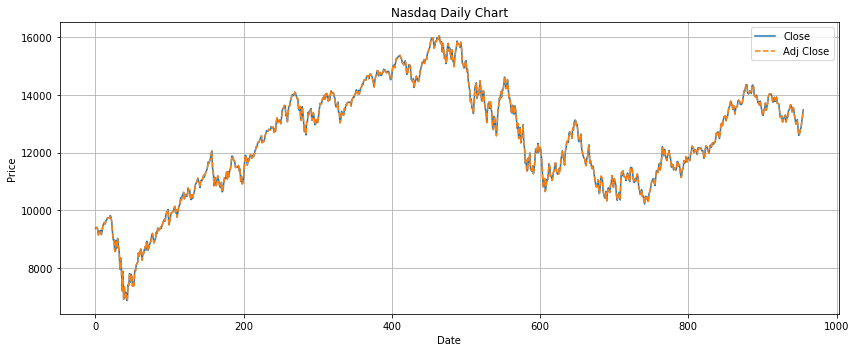

In [6]:
plt.figure(figsize=(12,5))
# 종가 데이터 그래프
plt.plot(df['Close'], label="Close")

# 조정된 종가 데이터 그래프 (Adj Close가 있다면)
if 'Adj Close' in df.columns:
    plt.plot(df['Adj Close'], label="Adj Close", linestyle="--")

plt.title("Nasdaq Daily Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

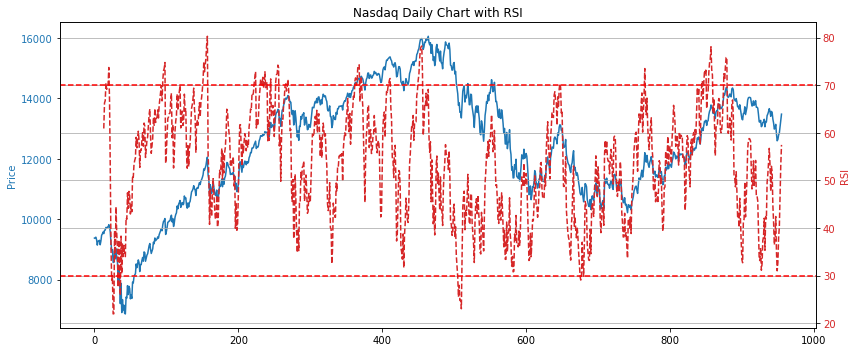

In [7]:
# RSI 계산 및 컬럼 추가
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

fig, ax1 = plt.subplots(figsize=(12, 5))

# 종가 그래프
ax1.set_ylabel('Price', color='tab:blue')
ax1.plot(df['Close'], label="Close", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # 두 번째 y축 생성
ax2.set_ylabel('RSI', color='tab:red')
ax2.plot(df['RSI'], label="RSI", linestyle="--", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

plt.title("Nasdaq Daily Chart with RSI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df['RSI'].isnull()
df['RSI'].isnull().sum()

13

In [9]:

numpy_array = df[['Date','Open','High','Low','Close','Adj Close','Volume','RSI']].to_numpy()

### 위에 차트 보기 복잡하니 rsi 데이터 트뷰처럼 아래로 빼서 가독성 높이기 + 
### rsi chart에 70이상 과매수(Red), 30이하 과매도(Green) 구간 진입 표시 


/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


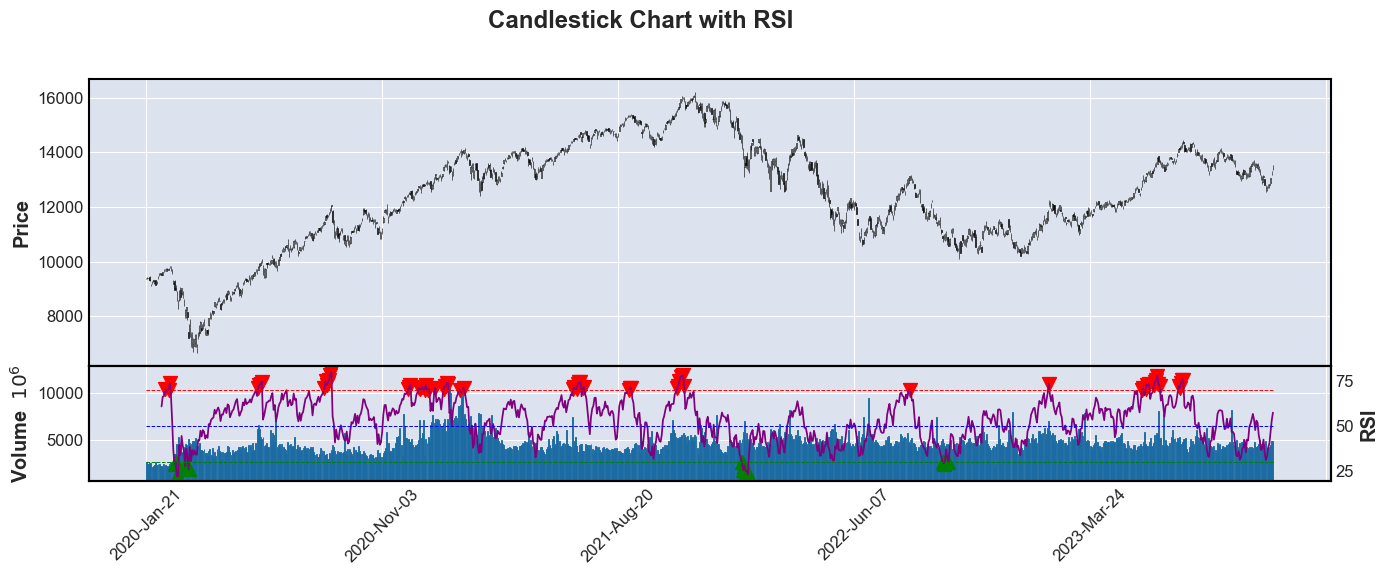

In [10]:

# 먼저 'Date' 열을 datetime으로 변환\
df['Date'] = pd.to_datetime(df['Date'])

# RSI 계산
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
# RSI 값에 기반하여 과매수 및 과매도 신호를 계산
overbought_signal = df['RSI'] >= 70
oversold_signal = df['RSI'] <= 30

# mplfinance는 인덱스가 datetime인 DataFrame을 요구합니다.
# 원본 df에서 'Date'를 제외하고 새로운 DataFrame을 만듭니다.
df_for_plotting = df.copy().drop('Date', axis=1)

# 이제 df의 'Date' 열을 인덱스로 쓰는 새로운 DataFrame의 인덱스로 설정\
df_for_plotting.set_index(df['Date'], inplace=True)

# 캔들스틱 차트와 RSI를 함께 그리기 위한 추가 플롯 설정
apds = [mpf.make_addplot(df['RSI'].values, panel=1, color='purple', ylabel='RSI'),
        mpf.make_addplot(np.full(len(df), 70), panel=1, type='line', color='red', linestyle='dashed', width=0.7),
        mpf.make_addplot(np.full(len(df), 50), panel=1, type='line', color='blue', linestyle='dashed', width=0.7),
        mpf.make_addplot(np.full(len(df), 30), panel=1, type='line', color='green', linestyle='dashed', width=0.7),
        mpf.make_addplot(np.where(overbought_signal, df['RSI'].values, np.nan), panel=1, type='scatter', markersize=100, marker='v', color='red'),
     mpf.make_addplot(np.where(oversold_signal, df['RSI'].values, np.nan), panel=1, type='scatter', markersize=100, marker='^', color='green')
       ]


# 캔들스틱 차트 그리기 over
mpf.plot(df_for_plotting, type='candle', addplot=apds, figratio=(12,4), volume=True, 
         title='Candlestick Chart with RSI', ylabel='Price')


In [11]:
# 과매수 신호의 개수
overbought_signals_count = np.sum(overbought_signal)

# 과매도 신호의 개수
oversold_signals_count = np.sum(oversold_signal)

print(f"과매수 신호 개수(Red): {overbought_signals_count}")
print(f"과매도 신호 개수(Green): {oversold_signals_count}")


과매수 신호 개수(Red): 69
과매도 신호 개수(Green): 16


## 과매수 과매도 구간 수익률 계산 및 포지션 진입 날짜 
- 포지션 로직: (70이상 시 공매도 -> 50 달성시 포지션 종료,30이하 시 공매수 -> 50달성시 포지션 종료)

In [12]:

overbought = 70  # 과매수 임계값
oversold = 30    # 과매도 임계값
exit_signal = 50 # 포지션 종료 신호

# 포지션 상태와 진입 가격을 기록하기 위한 컬럼 생성
df['position'] = None  # 현재 포지션 상태
df['entry_price'] = np.nan  # 포지션 진입 가격
df['exit_price'] = np.nan  # 포지션 종료 가격
df['profit'] = np.nan  # 포지션별 수익률
df['position_date'] = None  # 포지션 진입/종료 날짜

# 포지션 로직
for i in range(1, len(df)):
    # 포지션 진입 로직
    if df.loc[i, 'RSI'] > overbought and df.loc[i-1, 'position'] != 'short':  # 과매수 구간에서는 매도 포지션 진입
        df.loc[i, 'position'] = 'short'
        df.loc[i, 'entry_price'] = df.loc[i, 'Close']
        df.loc[i, 'position_date'] = df.loc[i, 'Date']  # 실제 날짜 할당

    elif df.loc[i, 'RSI'] < oversold and df.loc[i-1, 'position'] != 'long':  # 과매도 구간에서는 매수 포지션 진입
        df.loc[i, 'position'] = 'long'
        df.loc[i, 'entry_price'] = df.loc[i, 'Close']
        df.loc[i, 'position_date'] = df.loc[i, 'Date']  # 실제 날짜 할당

    # 매도 포지션 종료 시 수익 계산
    elif df.loc[i, 'RSI'] <= exit_signal and df.loc[i-1, 'position'] == 'short':
        df.loc[i, 'position'] = None
        df.loc[i, 'exit_price'] = df.loc[i, 'Close']
        df.loc[i, 'profit'] = ((df.loc[i-1, 'entry_price'] - df.loc[i, 'exit_price']) / df.loc[i, 'exit_price']) * 100
        df.loc[i, 'position_date'] = df.loc[i, 'Date']  # 실제 날짜 할당

    # 매수 포지션 종료 시 수익 계산
    elif df.loc[i, 'RSI'] >= exit_signal and df.loc[i-1, 'position'] == 'long':
        df.loc[i, 'position'] = None
        df.loc[i, 'exit_price'] = df.loc[i, 'Close']
        df.loc[i, 'profit'] = ((df.loc[i, 'exit_price'] - df.loc[i-1, 'entry_price']) / df.loc[i-1, 'entry_price']) * 100
        df.loc[i, 'position_date'] = df.loc[i, 'Date']  # 실제 날짜 할당


    # 포지션 유지 로직
    else:
        df.loc[i, 'position'] = df.loc[i-1, 'position']
        df.loc[i, 'entry_price'] = df.loc[i-1, 'entry_price']



# 'Date' 열을 날짜 형식으로 변환 
df['Date'] = pd.to_datetime(df['Date']).dt.date  # 시간을 제거

# 초기화된 'position_date' 컬럼도 날짜 형식으로 변환
df['position_date'] = pd.to_datetime(df['position_date']).dt.date  # 시간을 제거

# 결과 출력
print("포지션 진입 및 종료:")
print(df[['position', 'entry_price', 'exit_price', 'profit', 'position_date']].dropna(how='all'))

# 총 수익 계산
initial_investment = 1000  # 초기 투자금액
total_profit = df['profit'].sum()  # 총 수익 계산





포지션 진입 및 종료:
    position   entry_price    exit_price    profit position_date
16     short   9725.959961           NaN       NaN    2020-02-12
17     short   9725.959961           NaN       NaN           NaT
18     short   9725.959961           NaN       NaN           NaT
19     short   9725.959961           NaN       NaN           NaT
20     short   9725.959961           NaN       NaN           NaT
..       ...           ...           ...       ...           ...
887    short  12975.690430           NaN       NaN           NaT
888    short  12975.690430           NaN       NaN           NaT
889    short  12975.690430           NaN       NaN           NaT
890    short  12975.690430           NaN       NaN           NaT
891     None           NaN  13909.240234 -6.711724    2023-08-04

[300 rows x 5 columns]


In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,position,entry_price,exit_price,profit,position_date
0,2020-01-21,9361.070312,9397.580078,9350.200195,9370.809570,9370.809570,2686610000,NaN,None,NaN,NaN,NaN,NaN
1,2020-01-22,9413.610352,9439.290039,9375.129883,9383.769531,9383.769531,2454580000,NaN,None,NaN,NaN,NaN,NaN
2,2020-01-23,9377.719727,9409.200195,9334.129883,9402.480469,9402.480469,2465850000,NaN,None,NaN,NaN,NaN,NaN
3,2020-01-24,9446.209961,9451.429688,9273.230469,9314.910156,9314.910156,2622970000,NaN,None,NaN,NaN,NaN,NaN
4,2020-01-27,9092.459961,9185.450195,9088.040039,9139.309570,9139.309570,2593910000,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2023-10-30,12750.469727,12842.959961,12691.559570,12789.480469,12789.480469,4149320000,38.052446,None,NaN,NaN,NaN,NaN
952,2023-10-31,12786.620117,12859.400391,12697.040039,12851.240234,12851.240234,4315630000,40.189765,None,NaN,NaN,NaN,NaN
953,2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000,46.905141,None,NaN,NaN,NaN,NaN
954,2023-11-02,13230.490234,13302.179688,13177.639648,13294.190430,13294.190430,4962950000,53.172975,None,NaN,NaN,NaN,NaN


## 수익현황 그래프 시각화

In [14]:
#  기간 내 수익률 현황
new_df = df[['position_date', 'profit']].dropna()
new_df



,position_date,profit
23,2020-02-24,5.472989
53,2020-04-06,-11.737852
160,2020-09-08,-9.528391
259,2021-01-29,-4.639846
274,2021-02-22,3.507342
376,2021-07-19,1.579892
419,2021-09-17,1.909137
468,2021-11-26,0.673006
519,2022-02-09,2.376361
652,2022-08-22,6.028957


In [15]:
initial_investment = 1000  # 초기 투자 금액
cumulative_investment = initial_investment  # 누적 투자 금액 초기화

# 누적 금액을 저장할 새로운 컬럼을 추가
new_df['cumulative_amount'] = np.nan

for index, row in new_df.iterrows():
    # 수익률을 적용하여 누적 투자 금액 업데이트
    # 수익률이 퍼센트이므로 100으로 나눈 후 1을 더해줌
    cumulative_investment *= (1 + (row['profit'] / 100))
    # 누적 금액을 새로운 컬럼에 저장
    new_df.loc[index, 'cumulative_amount'] = cumulative_investment

print(new_df)


    position_date     profit  cumulative_amount
23     2020-02-24   5.472989        1054.729894
53     2020-04-06 -11.737852         930.927255
160    2020-09-08  -9.528391         842.224866
259    2021-01-29  -4.639846         803.146926
274    2021-02-22   3.507342         831.316039
376    2021-07-19   1.579892         844.449936
419    2021-09-17   1.909137         860.571640
468    2021-11-26   0.673006         866.363337
519    2022-02-09   2.376361         886.951256
652    2022-08-22   6.028957         940.425162
696    2022-10-24   0.779179         947.752761
777    2023-02-21   6.165176        1006.183386
891    2023-08-04  -6.711724         938.651135


In [18]:
# trades_df 데이터프레임의 마지막 행을 선택합니다.
last_row = new_df.iloc[-1]

# 마지막 행의 'cumulative_amount' 값을 가져와서 last_cumulative_amount 변수에 할당합니다.
last_cumulative_amount = last_row['cumulative_amount']

# last_cumulative_amount 변수를 출력합니다.
print(f"last_cumulative_amount: {last_cumulative_amount}")


last_cumulative_amount: 938.6511351804006


In [19]:
# 누적 수익률 계산
return_percentage = ((last_cumulative_amount / initial_investment) - 1) * 100
print(f"누적 수익률: {return_percentage:.2f}%")

누적 수익률: -6.13%


- 누적 수익률 변경 현황 시각화

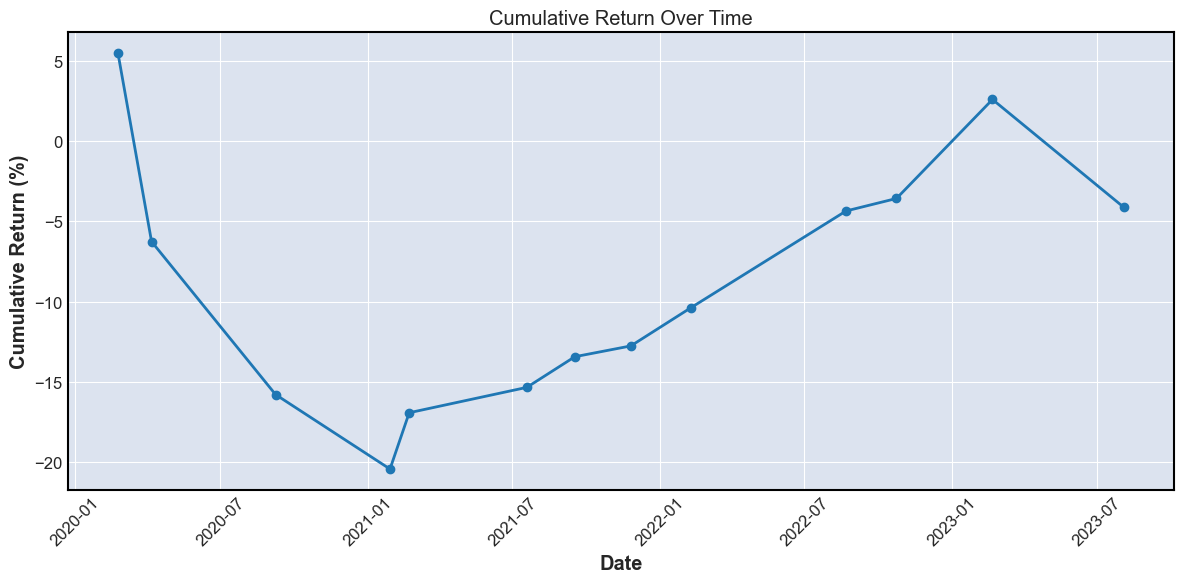

In [28]:
# 데이터프레임을 'position_date' 열을 기준으로 정렬
new_df = new_df.sort_values(by='position_date')

# 'position_date'와 'profit' 열을 넘파이 배열로 변환
position_date_np = new_df['position_date'].values
profit_np = new_df['profit'].values

# 누적 수익률 계산
cumulative_return_np = np.cumsum(profit_np)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(position_date_np, cumulative_return_np, marker='o', linestyle='-')
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 수익률이 기대했던 것 보다 낮게나와서 포지션 진입 로직 변경(다이버전스 개념 적용)

- 다이버전스 함수 정의 및 다이버전스 컨펌 시 price 및 rsi 출력 + 해당 Date 출력

In [29]:
def find_divergence(df):
    # 결과를 저장할 리스트 초기화
    peaks = []
    troughs = []

    # 다이버전스를 확인하기 위한 초기 값 설정
    prev_high_price = prev_low_price = df['Close'][0]
    prev_high_rsi = prev_low_rsi = df['RSI'][0]
    prev_peak_date = prev_trough_date = df['Date'][0]  # 이전 고점과 저점의 날짜 추적을 위한 변수 추가

    # 각 행마다 반복
    for index, row in df.iterrows():
        current_price = row['Close']
        current_rsi = row['RSI']
        current_date = row['Date']

        # 고점을 찾는 경우 (가격은 상승하지만 RSI는 하락하는 경우)
        if current_price > prev_high_price and current_rsi < prev_high_rsi:
            # 이전에 발견한 고점을 리스트에 추가
            peaks.append({'Date': prev_peak_date, 'Price': prev_high_price, 'RSI': prev_high_rsi})

        # 저점을 찾는 경우 (가격은 하락하지만 RSI는 상승하는 경우)
        elif current_price < prev_low_price and current_rsi > prev_low_rsi:
            # 이전에 발견한 저점을 리스트에 추가
            troughs.append({'Date': prev_trough_date, 'Price': prev_low_price, 'RSI': prev_low_rsi})

        # 이전 고점과 저점을 현재 행의 값으로 갱신
        if current_price > prev_high_price:
            prev_high_price = current_price
            prev_high_rsi = current_rsi
            prev_peak_date = current_date  # 날짜 갱신

        if current_price < prev_low_price:
            prev_low_price = current_price
            prev_low_rsi = current_rsi
            prev_trough_date = current_date  # 날짜 갱신

    # 결과 데이터프레임 생성
    peaks_df = pd.DataFrame(peaks)
    troughs_df = pd.DataFrame(troughs)
    
    return peaks_df, troughs_df

# 다이버전스 찾기
peaks_df, troughs_df = find_divergence(df)

# 결과 출력
print("Peaks (Possible bearish divergence):")
print(peaks_df)
print("\nTroughs (Possible bullish divergence):")
print(troughs_df)


Peaks (Possible bearish divergence):
          Date         Price        RSI
0   2020-02-12   9725.959961  70.482561
1   2020-02-19   9817.179688  73.722322
2   2020-06-10  10020.349609  74.771807
3   2020-06-23  10131.370117  68.328739
4   2020-07-06  10433.650391  68.144446
5   2020-07-10  10617.440430  69.970516
6   2020-07-20  10767.089844  68.116546
7   2020-08-06  11108.070312  69.387304
8   2020-08-26  11665.059570  74.945772
9   2020-09-02  12056.440430  80.283422
10  2020-12-08  12582.769531  72.866830
11  2020-12-28  12899.419922  72.822325
12  2021-01-08  13201.980469  71.326366
13  2021-01-25  13635.990234  74.223743
14  2021-02-09  14007.700195  70.283113
15  2021-02-12  14095.469727  71.208238
16  2021-06-14  14174.139648  67.211807
17  2021-07-07  14665.059570  74.294301
18  2021-07-12  14733.240234  71.826901
19  2021-07-26  14840.709961  65.768237
20  2021-08-05  14895.120117  63.629937
21  2021-09-07  15374.330078  71.414277
22  2021-11-08  15982.360352  78.231299

Tr

- peak에는 공매도, rsi가 30에 진입하면 포지션 종료 후 수익화, 반대로 trough에는 공매수하고 rsi가 70진입하면 포지션 종료후 수익화 전략

In [31]:
def execute_trades(df, peaks_df, troughs_df):
    trades = []  # 거래 내역 저장 리스트

    # 공매도 포지션 실행
    for _, peak in peaks_df.iterrows():
        entry_date = peak['Date']
        entry_price = peak['Price']
        # 데이터프레임에서 진입 날짜 이후의 데이터만 필터링
        post_entry_df = df[df['Date'] > entry_date]

        # 포지션 종료 조건 (RSI < 30) 탐색 및 종료 날짜가 진입 날짜 이후인지 확인
        exit_row = post_entry_df[(post_entry_df['RSI'] <= 30) & (post_entry_df['Date'] > entry_date)].head(1)
        if not exit_row.empty:
            exit_date = exit_row['Date'].values[0]
            exit_price = exit_row['Close'].values[0]
            # 공매도 수익 계산
            profit = entry_price - exit_price
            trades.append({
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Position': 'Short',
                'Entry Price': entry_price,
                'Exit Price': exit_price,
                'Profit': profit
            })

    # 공매수 포지션 실행
    for _, trough in troughs_df.iterrows():
        entry_date = trough['Date']
        entry_price = trough['Price']
        # 데이터프레임에서 진입 날짜 이후의 데이터만 필터링
        post_entry_df = df[df['Date'] > entry_date]

        # 포지션 종료 조건 (RSI > 70) 탐색 및 종료 날짜가 진입 날짜 이후인지 확인
        exit_row = post_entry_df[(post_entry_df['RSI'] >= 70) & (post_entry_df['Date'] > entry_date)].head(1)
        if not exit_row.empty:
            exit_date = exit_row['Date'].values[0]
            exit_price = exit_row['Close'].values[0]
            # 공매수 수익 계산
            profit = exit_price - entry_price
            trades.append({
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Position': 'Long',
                'Entry Price': entry_price,
                'Exit Price': exit_price,
                'Profit': profit
            })

    # 거래 내역을 데이터프레임으로 변환
    trades_df = pd.DataFrame(trades)
    return trades_df

# 실행
trades_df = execute_trades(df, peaks_df, troughs_df)

# 결과 출력
print(trades_df)


    Entry Date   Exit Date Position   Entry Price    Exit Price       Profit
0   2020-02-12  2020-02-25    Short   9725.959961   8965.610352   760.349609
1   2020-02-19  2020-02-25    Short   9817.179688   8965.610352   851.569336
2   2020-06-10  2022-01-20    Short  10020.349609  14154.019531 -4133.669922
3   2020-06-23  2022-01-20    Short  10131.370117  14154.019531 -4022.649414
4   2020-07-06  2022-01-20    Short  10433.650391  14154.019531 -3720.369141
5   2020-07-10  2022-01-20    Short  10617.440430  14154.019531 -3536.579102
6   2020-07-20  2022-01-20    Short  10767.089844  14154.019531 -3386.929688
7   2020-08-06  2022-01-20    Short  11108.070312  14154.019531 -3045.949219
8   2020-08-26  2022-01-20    Short  11665.059570  14154.019531 -2488.959961
9   2020-09-02  2022-01-20    Short  12056.440430  14154.019531 -2097.579102
10  2020-12-08  2022-01-20    Short  12582.769531  14154.019531 -1571.250000
11  2020-12-28  2022-01-20    Short  12899.419922  14154.019531 -1254.599609

- 일봉을 기준으로 한 다이버전스 컨펌이라 그런지 3년 치 데이터 인데도 진입횟수가 매우 적음.
- 2년을 넘게 존버하는 경우와 같은 문제점 다수 발견 + 수익률도 ㅈ망
- 포지션 종료도 전에 다른 포지션 진입하는 거 제거해야함

In [33]:
# 다이버전스 탐지 후 포지션 진입했는데  다시 rsi가 30,70으로 진입하면 포지션 종료하는 로직 추가
# - 포지션 진입하면 나오기 전까지 다른 포지션을 잡지 않도록 수정까지 완료

In [60]:
def execute_trades(df, peaks_df, troughs_df):
    trades = []  # 거래 내역 저장 리스트
    seed_money = 1000  # 초기 자본 설정
    previous_seed_money = seed_money  # 이전 시드 머니 초기화
    previous_short_exit_date = None  # 이전 단기 포지션의 종료 날짜
    previous_long_exit_date = None  # 이전 장기 포지션의 종료 날짜

    # 공매도 포지션 실행
    for _, peak in peaks_df.iterrows():
        entry_date = peak['Date']
        entry_price = peak['Price']
        
        if previous_short_exit_date is None or entry_date > previous_short_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] < 30) | 
                                      (post_entry_df['RSI'].shift(-1) > 70) & (post_entry_df['RSI'] < post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((entry_price - exit_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_short_exit_date = exit_date  # 이전 단기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Short',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 공매수 포지션 실행
    for _, trough in troughs_df.iterrows():
        entry_date = trough['Date']
        entry_price = trough['Price']
        
        if previous_long_exit_date is None or entry_date > previous_long_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] > 70) | 
                                      (post_entry_df['RSI'].shift(-1) < 30) & (post_entry_df['RSI'] > post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((exit_price - entry_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_long_exit_date = exit_date  # 이전 장기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Long',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 거래 내역을 데이터프레임으로 변환
    trades_df = pd.DataFrame(trades)
    
    # 최종 누적 수익률 계산
    final_return_percentage = (previous_seed_money - seed_money) / seed_money * 100
    
    return trades_df, final_return_percentage

# 데이터프레임 df, peaks_df, troughs_df가 정의되어 있다고 가정하고 함수를 실행
trades_df, final_return_percentage = execute_trades(df, peaks_df, troughs_df)

# 결과 출력
print(trades_df)
print(f"Final Cumulative Return (%): {final_return_percentage:.2f}%")


    Entry Date   Exit Date Position   Entry Price    Exit Price      Profit  \
0   2020-02-12  2020-02-14    Short   9725.959961   9731.179688   -0.536680   
1   2020-02-19  2020-02-25    Short   9817.179688   8965.610352   86.696214   
2   2020-06-10  2020-08-24    Short  10020.349609  11379.719727 -147.349431   
3   2020-08-26  2020-08-27    Short  11665.059570  11625.339844    3.196664   
4   2020-09-02  2020-12-03    Short  12056.440430  12377.179688  -25.060345   
5   2020-12-08  2020-12-16    Short  12582.769531  12658.190430   -5.496161   
6   2020-12-28  2020-12-29    Short  12899.419922  12850.219727    3.476399   
7   2021-01-08  2021-01-19    Short  13201.980469  13197.179688    0.332705   
8   2021-01-25  2021-02-08    Short  13635.990234  13987.639648  -23.603010   
9   2021-02-09  2021-02-11    Short  14007.700195  14025.769531   -1.150199   
10  2021-02-12  2021-06-25    Short  14095.469727  14360.389648  -16.736783   
11  2021-07-07  2021-07-08    Short  14665.059570  1

In [34]:
# 기본 포지션 종료 30 -> 35로 변경해보자

In [59]:
def execute_trades(df, peaks_df, troughs_df):
    trades = []  # 거래 내역 저장 리스트
    seed_money = 1000  # 초기 자본 설정
    previous_seed_money = seed_money  # 이전 시드 머니 초기화
    previous_short_exit_date = None  # 이전 단기 포지션의 종료 날짜
    previous_long_exit_date = None  # 이전 장기 포지션의 종료 날짜

    # 공매도 포지션 실행
    for _, peak in peaks_df.iterrows():
        entry_date = peak['Date']
        entry_price = peak['Price']
        
        if previous_short_exit_date is None or entry_date > previous_short_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] < 35) | 
                                      (post_entry_df['RSI'].shift(-1) > 70) & (post_entry_df['RSI'] < post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((entry_price - exit_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_short_exit_date = exit_date  # 이전 단기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Short',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 공매수 포지션 실행
    for _, trough in troughs_df.iterrows():
        entry_date = trough['Date']
        entry_price = trough['Price']
        
        if previous_long_exit_date is None or entry_date > previous_long_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] > 70) | 
                                      (post_entry_df['RSI'].shift(-1) < 30) & (post_entry_df['RSI'] > post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((exit_price - entry_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_long_exit_date = exit_date  # 이전 장기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Long',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 거래 내역을 데이터프레임으로 변환
    trades_df = pd.DataFrame(trades)
    
    # 최종 누적 수익률 계산
    final_return_percentage = (previous_seed_money - seed_money) / seed_money * 100
    
    return trades_df, final_return_percentage

# 데이터프레임 df, peaks_df, troughs_df가 정의되어 있다고 가정하고 함수를 실행
trades_df, final_return_percentage = execute_trades(df, peaks_df, troughs_df)

# 결과 출력
print(trades_df)
print(f"Final Cumulative Return (%): {final_return_percentage:.2f}%")


    Entry Date   Exit Date Position   Entry Price    Exit Price      Profit  \
0   2020-02-12  2020-02-14    Short   9725.959961   9731.179688   -0.536680   
1   2020-02-19  2020-02-25    Short   9817.179688   8965.610352   86.696214   
2   2020-06-10  2020-08-24    Short  10020.349609  11379.719727 -147.349431   
3   2020-08-26  2020-08-27    Short  11665.059570  11625.339844    3.196664   
4   2020-09-02  2020-12-03    Short  12056.440430  12377.179688  -25.060345   
5   2020-12-08  2020-12-16    Short  12582.769531  12658.190430   -5.496161   
6   2020-12-28  2020-12-29    Short  12899.419922  12850.219727    3.476399   
7   2021-01-08  2021-01-19    Short  13201.980469  13197.179688    0.332705   
8   2021-01-25  2021-02-08    Short  13635.990234  13987.639648  -23.603010   
9   2021-02-09  2021-02-11    Short  14007.700195  14025.769531   -1.150199   
10  2021-02-12  2021-03-04    Short  14095.469727  12723.469727   86.678520   
11  2021-06-14  2021-06-25    Short  14174.139648  1

In [42]:
# 기본 포지션 종료 30 -> 35로 변경 시 수익 많이 올랐음 확인.

In [43]:
# 매 거래마다의 수익률 컬럼 추가 pnl ratio (profit and loss ratio)
# 기본 포지션 종료 30->25, 70->75으로 변경     

In [56]:
def execute_trades(df, peaks_df, troughs_df):
    trades = []  # 거래 내역 저장 리스트
    seed_money = 1000  # 초기 자본 설정
    previous_seed_money = seed_money  # 이전 시드 머니 초기화
    previous_short_exit_date = None  # 이전 단기 포지션의 종료 날짜
    previous_long_exit_date = None  # 이전 장기 포지션의 종료 날짜

    # 공매도 포지션 실행
    for _, peak in peaks_df.iterrows():
        entry_date = peak['Date']
        entry_price = peak['Price']
        
        if previous_short_exit_date is None or entry_date > previous_short_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] < 25) | 
                                      (post_entry_df['RSI'].shift(-1) > 70) & (post_entry_df['RSI'] < post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((entry_price - exit_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_short_exit_date = exit_date  # 이전 단기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Short',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 공매수 포지션 실행
    for _, trough in troughs_df.iterrows():
        entry_date = trough['Date']
        entry_price = trough['Price']
        
        if previous_long_exit_date is None or entry_date > previous_long_exit_date:
            post_entry_df = df[df['Date'] > entry_date]
            exit_row = post_entry_df[((post_entry_df['RSI'] > 75) | 
                                      (post_entry_df['RSI'].shift(-1) < 30) & (post_entry_df['RSI'] > post_entry_df['RSI'].shift(-1)))
                                      & (post_entry_df['Date'] > entry_date)].head(1)
            if not exit_row.empty:
                exit_date = exit_row['Date'].values[0]
                exit_price = exit_row['Close'].values[0]
                profit = previous_seed_money * ((exit_price - entry_price) / entry_price)
                current_seed_money = previous_seed_money + profit
                pnl = (current_seed_money - previous_seed_money) / previous_seed_money * 100  # 거래별 PnL 계산
                previous_seed_money = current_seed_money  # 시드 머니 업데이트
                previous_long_exit_date = exit_date  # 이전 장기 포지션의 종료일 업데이트
                trades.append({
                    'Entry Date': entry_date,
                    'Exit Date': exit_date,
                    'Position': 'Long',
                    'Entry Price': entry_price,
                    'Exit Price': exit_price,
                    'Profit': profit,
                    'PnL Ratio': f"{pnl:.2f}%",  # PnL에 '%' 추가
                    'Current Seed Money': current_seed_money
                })

    # 거래 내역을 데이터프레임으로 변환
    trades_df = pd.DataFrame(trades)
    
    # 최종 누적 수익률 계산
    final_return_percentage = (previous_seed_money - seed_money) / seed_money * 100
    
    return trades_df, final_return_percentage

# 데이터프레임 df, peaks_df, troughs_df가 정의되어 있다고 가정하고 함수를 실행
trades_df, final_return_percentage = execute_trades(df, peaks_df, troughs_df)

# 결과 출력
print(trades_df)
print(f"Final Cumulative Return (%): {final_return_percentage:.2f}%")


    Entry Date   Exit Date Position   Entry Price    Exit Price      Profit  \
0   2020-02-12  2020-02-14    Short   9725.959961   9731.179688   -0.536680   
1   2020-02-19  2020-02-27    Short   9817.179688   8566.480469  127.330663   
2   2020-06-10  2020-08-24    Short  10020.349609  11379.719727 -152.861939   
3   2020-08-26  2020-08-27    Short  11665.059570  11625.339844    3.316255   
4   2020-09-02  2020-12-03    Short  12056.440430  12377.179688  -25.997880   
5   2020-12-08  2020-12-16    Short  12582.769531  12658.190430   -5.701778   
6   2020-12-28  2020-12-29    Short  12899.419922  12850.219727    3.606455   
7   2021-01-08  2021-01-19    Short  13201.980469  13197.179688    0.345152   
8   2021-01-25  2021-02-08    Short  13635.990234  13987.639648  -24.486026   
9   2021-02-09  2021-02-11    Short  14007.700195  14025.769531   -1.193229   
10  2021-02-12  2021-06-25    Short  14095.469727  14360.389648  -17.362925   
11  2021-07-07  2021-07-08    Short  14665.059570  1

# Bollinger Band

## 데이터 가져오기

In [61]:
#데이터 가져오기 

start ="2020-01-18" #코로나 금리인하 후 상승 시작 #21년 6월 말 최고점찍고 하락 조정 
end="2023-11-06" #어제까지 
symbol = "^IXIC" #야후파낸 나스닥 별칭

df1=yf.download(symbol,start,end) # rsi랑 다른 데이터프레임 생성 
df1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-21,9361.070312,9397.580078,9350.200195,9370.809570,9370.809570,2686610000
2020-01-22,9413.610352,9439.290039,9375.129883,9383.769531,9383.769531,2454580000
2020-01-23,9377.719727,9409.200195,9334.129883,9402.480469,9402.480469,2465850000
2020-01-24,9446.209961,9451.429688,9273.230469,9314.910156,9314.910156,2622970000
2020-01-27,9092.459961,9185.450195,9088.040039,9139.309570,9139.309570,2593910000
...,...,...,...,...,...,...
2023-10-30,12750.469727,12842.959961,12691.559570,12789.480469,12789.480469,4149320000
2023-10-31,12786.620117,12859.400391,12697.040039,12851.240234,12851.240234,4315630000
2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000


In [62]:

from ta.volatility import BollingerBands


# Bollinger Bands 지표 계산
indicator_bb = BollingerBands(close=df1['Close'], window=20, window_dev=2)

# 볼린저 밴드 상단, 중간, 하단 값을 DataFrame에 추가
df1['bb_bbm'] = indicator_bb.bollinger_mavg()
df1['bb_bbh'] = indicator_bb.bollinger_hband()
df1['bb_bbl'] = indicator_bb.bollinger_lband()


df1

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,
2020-01-21,9361.070312,9397.580078,9350.200195,9370.809570,9370.809570,2686610000,NaN,NaN,NaN
2020-01-22,9413.610352,9439.290039,9375.129883,9383.769531,9383.769531,2454580000,NaN,NaN,NaN
2020-01-23,9377.719727,9409.200195,9334.129883,9402.480469,9402.480469,2465850000,NaN,NaN,NaN
2020-01-24,9446.209961,9451.429688,9273.230469,9314.910156,9314.910156,2622970000,NaN,NaN,NaN
2020-01-27,9092.459961,9185.450195,9088.040039,9139.309570,9139.309570,2593910000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-10-30,12750.469727,12842.959961,12691.559570,12789.480469,12789.480469,4149320000,13211.419971,13845.458108,12577.381833
2023-10-31,12786.620117,12859.400391,12697.040039,12851.240234,12851.240234,4315630000,13201.008496,13851.315253,12550.701739
2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000,13192.281494,13845.154707,12539.408282


## 매매 신호 생성,표기(green: 공매수, red: 공매도) 및 주가와 함께 볼린저 밴드 시각화 

In [63]:
# 매매 신호 생성
# 상단 밴드 이탈 시 공매도 신호 (-1), 공매수신호(1), 보유 or 행동 없음(0)
df1['position'] = df1.apply(lambda row: -1 if row['Close'] > row['bb_bbh'] else 1 if row['Close'] < row['bb_bbl'] else 0, axis=1)

# 매매 가격 설정: 공매도 신호일 때는 Close 가격으로 매도하고, 공매수 신호일 때는 Close 가격으로 매수
df1['entry_price'] = df1.apply(lambda row: row['Close'] if row['position'] != 0 else None, axis=1)

In [64]:
position_counts = df1['position'].value_counts()

# 공매수 신호(1)의 갯수
long_signals_count = position_counts.get(1, 0)  # 1이 없는 경우를 대비해 기본값으로 0 설정

# 공매도 신호(-1)의 개수
short_signals_count = position_counts.get(-1, 0)  # -1이 없는 경우를 대비해 기본값으로 0 설정

print(f"Number of Long/Buy signals: {long_signals_count}")
print(f"Number of Short/Sell signals: {short_signals_count}")


Number of Long/Buy signals: 56
Number of Short/Sell signals: 42


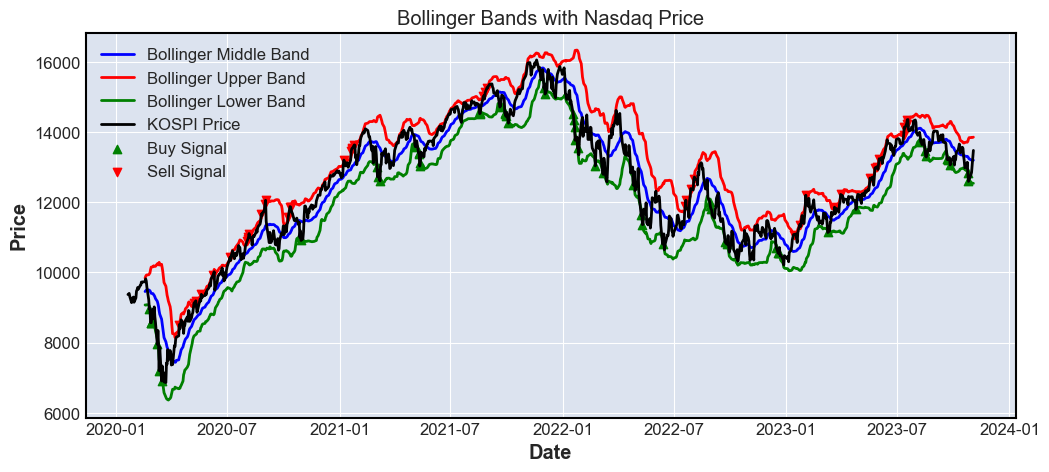

In [65]:
plt.figure(figsize=(12, 5))

# Bollinger Bands 그리기
plt.plot(df1.index.to_numpy(), df1['bb_bbm'].to_numpy(), label='Bollinger Middle Band', color='blue')
plt.plot(df1.index.to_numpy(), df1['bb_bbh'].to_numpy(), label='Bollinger Upper Band', color='red')
plt.plot(df1.index.to_numpy(), df1['bb_bbl'].to_numpy(), label='Bollinger Lower Band', color='green')

# 코스피 주가 데이터 그리기
plt.plot(df1.index.to_numpy(), df1['Close'].to_numpy(), label='KOSPI Price', color='black')

# 매수 신호와 매도 신호 표시
buy_signals = df1[df1['position'] == 1]
sell_signals = df1[df1['position'] == -1]
plt.scatter(buy_signals.index.to_numpy(), buy_signals['Close'].to_numpy(), marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index.to_numpy(), sell_signals['Close'].to_numpy(), marker='v', color='red', label='Sell Signal', alpha=1)

# 그래프 제목과 축 레이블 추가
plt.title('Bollinger Bands with Nasdaq Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(loc='best')
plt.grid(True)
plt.show()



In [66]:
df1

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,position,entry_price
Date,,,,,,,,,,,
2020-01-21,9361.070312,9397.580078,9350.200195,9370.809570,9370.809570,2686610000,NaN,NaN,NaN,0,NaN
2020-01-22,9413.610352,9439.290039,9375.129883,9383.769531,9383.769531,2454580000,NaN,NaN,NaN,0,NaN
2020-01-23,9377.719727,9409.200195,9334.129883,9402.480469,9402.480469,2465850000,NaN,NaN,NaN,0,NaN
2020-01-24,9446.209961,9451.429688,9273.230469,9314.910156,9314.910156,2622970000,NaN,NaN,NaN,0,NaN
2020-01-27,9092.459961,9185.450195,9088.040039,9139.309570,9139.309570,2593910000,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,12750.469727,12842.959961,12691.559570,12789.480469,12789.480469,4149320000,13211.419971,13845.458108,12577.381833,0,NaN
2023-10-31,12786.620117,12859.400391,12697.040039,12851.240234,12851.240234,4315630000,13201.008496,13851.315253,12550.701739,0,NaN
2023-11-01,12887.059570,13072.419922,12875.200195,13061.469727,13061.469727,4545120000,13192.281494,13845.154707,12539.408282,0,NaN


In [67]:

# 초기 포지션과 가격 컬럼 설정
df1['position'] = None  # 현재 포지션 상태
df1['entry_price'] = np.nan  # 포지션 진입 가격
df1['exit_price'] = np.nan  # 포지션 종료 가격
df1['profit'] = np.nan  # 포지션별 수익률

# 포지션 로직
for idx, (i, row) in enumerate(df1.iterrows()):
    if idx > 0:
        prev_row = df1.iloc[idx-1]

        # 과매도 상태에서 매수 포지션 진입
        if row['Close'] < row['bb_bbl'] and prev_row['position'] != 'long':
            df1.at[i, 'position'] = 'long'
            df1.at[i, 'entry_price'] = row['Close']

        # 과매수 상태에서 매도 포지션 진입
        elif row['Close'] > row['bb_bbh'] and prev_row['position'] != 'short':
            df1.at[i, 'position'] = 'short'
            df1.at[i, 'entry_price'] = row['Close']

        # 매수 포지션 종료 및 수익 계산
        elif row['Close'] >= row['bb_bbm'] and prev_row['position'] == 'long':
            exit_price = row['Close']
            df1.at[i, 'profit'] = ((exit_price - prev_row['entry_price']) / prev_row['entry_price']) * 100
            df1.at[i, 'position'] = None
            df1.at[i, 'exit_price'] = exit_price

        # 매도 포지션 종료 및 수익 계산
        elif row['Close'] <= row['bb_bbm'] and prev_row['position'] == 'short':
            exit_price = row['Close']
            df1.at[i, 'profit'] = ((prev_row['entry_price'] - exit_price) / exit_price) * 100
            df1.at[i, 'position'] = None
            df1.at[i, 'exit_price'] = exit_price

        # 포지션 유지
        else:
            df1.at[i, 'position'] = prev_row['position']
            df1.at[i, 'entry_price'] = prev_row['entry_price']

# 결과 출력
print(df1[['position', 'entry_price', 'exit_price', 'profit']])


           position   entry_price   exit_price    profit
Date                                                    
2020-01-21     None           NaN          NaN       NaN
2020-01-22     None           NaN          NaN       NaN
2020-01-23     None           NaN          NaN       NaN
2020-01-24     None           NaN          NaN       NaN
2020-01-27     None           NaN          NaN       NaN
...             ...           ...          ...       ...
2023-10-30     long  12821.219727          NaN       NaN
2023-10-31     long  12821.219727          NaN       NaN
2023-11-01     long  12821.219727          NaN       NaN
2023-11-02     None           NaN  13294.19043  3.688968
2023-11-03     None           NaN          NaN       NaN

[956 rows x 4 columns]


In [68]:
# 모든 값이 NaN인 행을 제거
df1.dropna(how='all', subset=['position', 'entry_price', 'exit_price', 'profit'], inplace=True)

# 결과 출력
df1[['position', 'entry_price', 'exit_price', 'profit']]


,position,entry_price,exit_price,profit
Date,,,,
2020-02-25,long,8965.610352,NaN,NaN
2020-02-26,long,8965.610352,NaN,NaN
2020-02-27,long,8965.610352,NaN,NaN
2020-02-28,long,8965.610352,NaN,NaN
2020-03-02,long,8965.610352,NaN,NaN
...,...,...,...,...
2023-10-27,long,12821.219727,NaN,NaN
2023-10-30,long,12821.219727,NaN,NaN
2023-10-31,long,12821.219727,NaN,NaN


In [75]:
initial_investment = 1000  # 초기 투자 금액 설정
current_investment = initial_investment  # 현재 투자 금액

# 'profit' 열에서 NaN 값이 아닌 경우에 대해 누적 수익률 계산
for profit in df_filtered['profit'].dropna():
    current_investment += current_investment * (profit / 100)

# 누적 수익률 계산
return_percentage = ((current_investment / initial_investment) - 1) * 100
print(f"누적 수익률: {return_percentage:.2f}%")



누적 수익률: -15.54%


## 수익률 변화 그래프 시각화

<ipython-input-71-14b76638aa31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cumulative_return'] = np.nan
<ipython-input-71-14b76638aa31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['cumulative_return'], inplace=True)


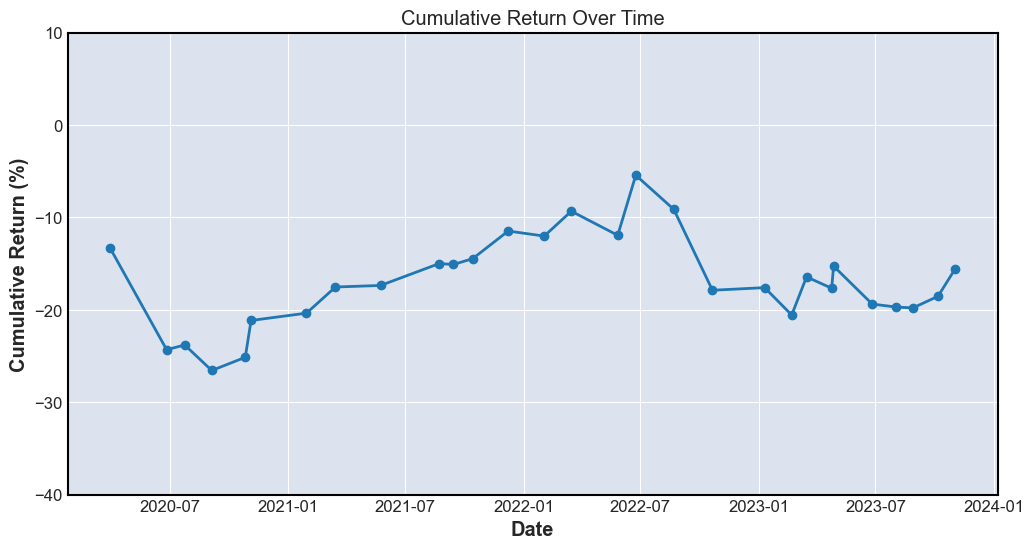

In [71]:

initial_investment = 1000  # 초기 투자 금액
current_investment = initial_investment
cumulative_returns = []  # 누적 수익률을 저장할 리스트

# 누적 수익률 계산
for profit in df_filtered['profit'].dropna():
    current_investment += current_investment * (profit / 100)
    cumulative_returns.append(((current_investment - initial_investment) / initial_investment) * 100)

# 누적 수익률을 데이터 프레임에 추가
df_filtered['cumulative_return'] = np.nan
df_filtered.loc[df_filtered['profit'].dropna().index, 'cumulative_return'] = cumulative_returns
#제공된 데이터에서 cumulative_return 열의 값 중에는 nan 값이 포함
#nan 값은 그래프에서 점으로 표시되고 선으로 연결되지 않습니다.ㅅㅂ
# 때문에 nan 값 무시 ㄱ

df_filtered.dropna(subset=['cumulative_return'], inplace=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index.tolist(), df_filtered['cumulative_return'].values, marker='o', linestyle='-')
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.ylim(-40, 10)  # 수익률 범위 설정 (-100% ~ 100%)
plt.grid(True)
plt.show()